*Mario Alberto Reyes Díaz*
- *Facultad de ciencias (UNAM)*
- *Análisis Topológico de Datos y Redes Neuronales*

Basado en:
https://github.com/giotto-ai/stock-market-crashes/blob/master/Stock%20Market%20Crash%20Detection.ipynb

## Librerias a autilizar

- Instalar `giotto-tda`

In [ ]:
pip install -U giotto-tda 

- Instalar `yfinace`

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
"""Plot functions """
# fuente: https://github.com/giotto-ai/stock-market-crashes/blob/master/plotting.py 
import pandas as pd
import matplotlib.pyplot as plt


def plot_crash_detections(
    start_date,
    end_date,
    threshold,
    distances,
    time_index_derivs,
    price_resampled_derivs,
    metric_name
):
    # calcular la media móvil, min, max de las derivadas homológicas 
    rolled_mean_h = pd.Series(distances).rolling(20, min_periods=1).mean()
    rolled_min_h = (
        pd.Series(distances)
        .rolling(len(distances), min_periods=1)
        .min()
    )
    rolled_max_h = (
        pd.Series(distances)
        .rolling(len(distances), min_periods=1)
        .max()
    )
     
    # normalizar los valores de la serie temporal para que se encuentren en el intervalo [0, 1] 
    probability_of_crash_h = (rolled_mean_h - rolled_min_h) / (
        rolled_max_h - rolled_min_h
    )

    # definir intervalos de tiempo para dibujar
    is_date_in_interval = (time_index_derivs > pd.Timestamp(start_date)) & (
        time_index_derivs < pd.Timestamp(end_date)
    )
    probability_of_crash_h_region = probability_of_crash_h[is_date_in_interval]
    time_index_region = time_index_derivs[is_date_in_interval]
    resampled_close_price_region = price_resampled_derivs.loc[is_date_in_interval]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(time_index_region, probability_of_crash_h_region, color="#1f77b4")
    plt.axhline(y=threshold, linewidth=2, color='#ff7f0e', linestyle='--', label='Threshold')
    plt.title(f"Crash Probability Based on {metric_name}")
    plt.legend(loc="best", prop={"size": 10},)

    plt.subplot(1, 2, 2)
    plt.plot(
        resampled_close_price_region[probability_of_crash_h_region.values > threshold],
        '#ff7f0e', marker='.', linestyle='None', markersize=4
    )
    plt.plot(
        resampled_close_price_region[probability_of_crash_h_region.values <= threshold],
        color="#1f77b4", marker='.', linestyle='None', markersize=4
    )

    plt.title("Close Price")
    plt.legend(
        [
            "Crash probability > {0}%".format(int(threshold * 100)),
            "Crash probability ≤ {0}%".format(int(threshold * 100)),
        ],
        loc="best",
        prop={"size": 10},
    )
    plt.savefig(f'./images/crash_{metric_name}.png')
    plt.show()
    
    
def plot_crash_comparisons(
    start_date,
    end_date,
    threshold,
    distances_1,
    distances_2,
    time_index_derivs,
    price_resampled_derivs,
):
    
    # calculate rolling mean, min, max of homological derivatives
    rolled_mean_1 = pd.Series(distances_1).rolling(20, min_periods=1).mean()
    rolled_min_1 = (
        pd.Series(distances_1)
        .rolling(len(distances_1), min_periods=1)
        .min()
    )
    rolled_max_1 = (
        pd.Series(distances_1)
        .rolling(len(distances_1), min_periods=1)
        .max()
    )

    # normalise the time series values to lies within [0, 1]
    probability_of_crash_1 = (rolled_mean_1 - rolled_min_1) / (
        rolled_max_1 - rolled_min_1
    )
    
    # calculate rolling mean, min, max of homological derivatives
    rolled_mean_2 = pd.Series(distances_2).rolling(20, min_periods=1).mean()
    rolled_min_2 = (
        pd.Series(distances_2)
        .rolling(len(distances_2), min_periods=1)
        .min()
    )
    rolled_max_2 = (
        pd.Series(distances_2)
        .rolling(len(distances_2), min_periods=1)
        .max()
    )

    # normalise the time series values to lies within [0, 1]
    probability_of_crash_2 = (rolled_mean_2 - rolled_min_2) / (
        rolled_max_2 - rolled_min_2
    )

    # define time intervals to plots
    is_date_in_interval = (time_index_derivs > pd.Timestamp(start_date)) & (
        time_index_derivs < pd.Timestamp(end_date)
    )
    probability_of_crash_1_region = probability_of_crash_1[is_date_in_interval]
    probability_of_crash_2_region = probability_of_crash_2[is_date_in_interval]

    time_index_region = time_index_derivs[is_date_in_interval]
    resampled_close_price_region = price_resampled_derivs.loc[is_date_in_interval]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(
        resampled_close_price_region[probability_of_crash_1_region.values > threshold],
        '#ff7f0e', marker='.', linestyle='None', markersize=4
    )
    plt.plot(
        resampled_close_price_region[probability_of_crash_1_region.values <= threshold],
        "#1f77b4", marker='.', linestyle='None', markersize=4
    )

    plt.title("Baseline Detector")
    plt.ylabel('Close Price', fontsize=12)
    plt.legend(
        [
            "Crash probability > {0}%".format(int(threshold * 100)),
            "Crash probability ≤ {0}%".format(int(threshold * 100)),
        ],
        loc="best",
        prop={"size": 10},
    )

    plt.subplot(1, 2, 2)
    plt.plot(
        resampled_close_price_region[probability_of_crash_2_region.values > threshold],
        '#ff7f0e', marker='.', linestyle='None', markersize=4
    )
    plt.plot(
        resampled_close_price_region[probability_of_crash_2_region.values <= threshold],
        "#1f77b4", marker='.', linestyle='None', markersize=4
    )

    plt.title('Topological Detector')
    plt.legend(
        [
            "Crash probability > {0}%".format(int(threshold * 100)),
            "Crash probability ≤ {0}%".format(int(threshold * 100)),
        ],
        loc="best",
        prop={"size": 10},
    )

    plt.savefig('./images/crash_comparison.png')
    plt.show()

------------------------------------------------------------------------
#**Los Datos Historicos de Mercado del Gas natural**
------------------------------------------------------------------------

### *Exploración de Datos*

- **Fuente para recolectar datos:**

https://finance.yahoo.com/

utilizando `yfinance`

i.- Exploración 

ii.- Tipos de datos 

iii.- Los datos perdidos 
  - Strings perdidos 
  - Integers perdidos

In [ ]:
from pandas_datareader import data as pdr
yf.pdr_override()
# Descargar el dataframe usando pandas_datareader para el siguiente intervalo 
dGasNatural = pdr.get_data_yahoo("NG=F", start="2000-01-01", end="2021-12-31")

dGasNatural.dtypes     #{.dtypes}los tipos de datos de cada columna

[*********************100%***********************]  1 of 1 completed


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
dGasNatural.describe() # {describe} para obtener datos rapidos de lo que hay dentro se puede utilizar el metodo
                         ##Sin parametros, {describe} solo mostrará datos relevantes para columnas que contengan números
                           ### - {count} cantidad de valores que contiene la columna.
                           ### - {mean} valor promedio.
                           ### - {std} desviación estandar.
                           ### - {min} valor mínimo.
                           ### - {25%} primer cuartil.
                           ### - {50%} segundo cuartil.
                           ### - {75%} tercer cuartil.
                           ### - {max} valor máximo.
                           ### - {dtype} tipo de valores que contiene la columna.

,Open,High,Low,Close,Adj Close,Volume
count,5358.000000,5358.000000,5358.000000,5358.00000,5358.00000,5358.000000
mean,4.511605,4.613144,4.408765,4.50679,4.50679,99331.988802
std,2.246145,2.306561,2.187866,2.24496,2.24496,63267.891662
min,1.441000,1.567000,1.432000,1.48200,1.48200,0.000000
25%,2.851250,2.911250,2.801250,2.85400,2.85400,42989.750000
50%,3.880000,3.955000,3.804500,3.87300,3.87300,90950.500000
75%,5.620000,5.766250,5.490000,5.62500,5.62500,142661.250000
max,15.160000,15.780000,14.851000,15.37800,15.37800,459196.000000


In [ ]:
# Encontrar datos perdidos

missing_data = dGasNatural.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Open
False    5358
Name: Open, dtype: int64

High
False    5358
Name: High, dtype: int64

Low
False    5358
Name: Low, dtype: int64

Close
False    5358
Name: Close, dtype: int64

Adj Close
False    5358
Name: Adj Close, dtype: int64

Volume
False    5358
Name: Volume, dtype: int64



Date
2000-08-30    4.805
2000-08-31    4.780
2000-09-01    4.835
2000-09-05    4.960
2000-09-06    5.065
              ...  
2021-12-23    3.731
2021-12-27    4.060
2021-12-28    4.055
2021-12-29    4.024
2021-12-30    3.561
Name: Close, Length: 5358, dtype: float64


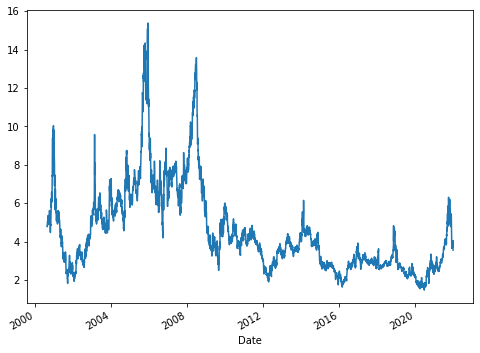

In [ ]:
# Solo la columna del precio de cierre, con la cual se va trabajar

dGasNatural.Close  
print(dGasNatural.Close)
plot = dGasNatural['Close'].plot(figsize=(8,6))

In [ ]:
start_year = '2000'
# {pad} para reemplazar los valores que faltan por el último valor que no falta 
remuestreo_dGasNatural = dGasNatural.Close.resample('24H').pad()[start_year:]

Date
2000-08-30    4.805
2000-08-31    4.780
2000-09-01    4.835
2000-09-02    4.835
2000-09-03    4.835
              ...  
2021-12-26    3.731
2021-12-27    4.060
2021-12-28    4.055
2021-12-29    4.024
2021-12-30    3.561
Freq: 24H, Name: Close, Length: 7793, dtype: float64


count    7793.000000
mean        4.508800
std         2.243331
min         1.482000
25%         2.854000
50%         3.875000
75%         5.620000
max        15.378000
Name: Close, dtype: float64

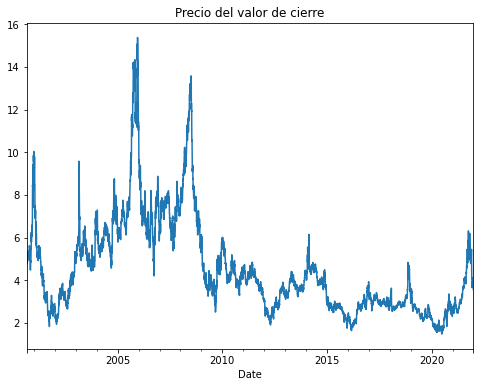

In [ ]:
remuestreo_dGasNatural  # Solo para la columna de Cierre con datos remuestredos
                        # Para muestrear los valores diarios espaciados uniformemente
print(remuestreo_dGasNatural)
plot = remuestreo_dGasNatural.plot(figsize=(8,6))
plt.title('Precio del valor de cierre')

remuestreo_dGasNatural.describe()

### **ATD-Gas Natural**

In [ ]:
# {gtda.time_series} implementa transformadores para preprocesar series de tiempo o incrustarlos en un espacio dimensional superior para una homología persistente. 
# {SingleTakensEmbedding} Representación de una única serie temporal univariante como una nube de puntos 

from gtda.time_series import SingleTakensEmbedding
#------------------------------------------------------------------------------#

# {gtda.plotting} implementa la función para trazar las salidas de los transformadores en giotto-tda.
# {plot_point_cloud} Traza las primeras 2 o 3 coordenadas de una nube de puntos.

from gtda.plotting import plot_point_cloud
#------------------------------------------------------------------------------#

# {gtda.homology} implementa transformadores para generar diagramas de persistencia. 
# {VietorisRipsPersistence} Diagramas de persistencia resultantes de filtraciones por Vietoris-Rips. 

from gtda.homology import VietorisRipsPersistence
#------------------------------------------------------------------------------#

# {gtda.diagrams} implementa transformadores para preprocesar diagramas de persistencia, extraer características de ellos o calcular distancias por pares entre diagramas. 
# {PersistenceLandscape} Paisajes de persistencia de diagramas de persistencia.

from gtda.diagrams import PersistenceLandscape
#------------------------------------------------------------------------------#

# {SlidingWindow} Ventanas deslizantes sobre los datos

from gtda.time_series import SlidingWindow

#------------------------------------------------------------------------------#

#### **Nube de Puntos a tráves de Takens**

Aplicando la incrustación de Takens en algún intervalo en lugar de en toda la serie de tiempo. Resultando en una serie de tiempo de nubes de puntos con una topología que resulta útil para el próposito propuesto

In [ ]:
# {time_delay} Retardo de tiempo entre dos valores consecutivos para construir un punto incrustado. 
# {dimension} Dimensión del espacio de empotramiento.
# {stride} Duración de la zancada entre dos puntos incrustados consecutivos. 
# {n_jobs} El número de trabajos a utilizar para el cálculo.
# {parameters_type} Los valores de {time_delay} y {dimension} que se usan directamente en {transform}.

#------------------------------------------------------------------------------#
# Estos parametros de un inicio están dados de forma aleatoria


embedding_dimension = 3  
embedding_time_delay = 3

# {Gas_embedder} para representar la serie de tiempo de precios de cierre como una serie de tiempo de una nubes de puntos
Gas_embedder = SingleTakensEmbedding(  
    parameters_type="fixed",
    n_jobs=None,
    time_delay=embedding_time_delay,
    dimension=embedding_dimension,
)

In [ ]:
# {fit_transform} Ajusta los datos y depues los transfórma. 
ValorPrecioCierre = remuestreo_dGasNatural.values 

GasClose_embedded = Gas_embedder.fit_transform(ValorPrecioCierre) #Incrustar datos
print(f"Forma de la serie temporal incrustada : {GasClose_embedded.shape}")

Forma de la serie temporal incrustada : (7787, 3)


In [ ]:
#Primer nube de puntos para el valor 'Close'.

#------------------------------------------------------------------------------#

plot_point_cloud(GasClose_embedded)

#### Elegir la dimensión de incrustación y el tiempo de retardo 

  - Información mutua para determinar $\tau$
  - Falsas vecindades para determinar $d$

In [ ]:
# Estos parametros los puede determinar `giotto-tda` de la siguiente forma

max_embedding_dimension = 4
max_time_delay = 6

Gas_embedder = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
)

In [ ]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Se adapta a un incrustación de Takens y muestra parámetros de búsqueda óptimos ."""
    GasClose_embedded = Gas_embedder.fit_transform(y)

    if verbose:
        print(f"Forma optima de la serie temporal incrustada : {GasClose_embedded.shape}")
        print(
            f"La dimensión de incrustación óptima es  {Gas_embedder.dimension_} y el tiempo de retraso es  {Gas_embedder.time_delay_}"
        )

    return GasClose_embedded

In [ ]:
GasClose_embedded = fit_embedder(Gas_embedder, ValorPrecioCierre)

Forma optima de la serie temporal incrustada : (7775, 4)
La dimensión de incrustación óptima es  4 y el tiempo de retraso es  6


#### **Ventanas Deslizantes**
- Aplicando el método de Ventana Deslizante para obtener las nubes de puntos por ventana. 

In [ ]:
# {size} Tamaño de cada ventana deslizante.
# {stride} Salto entre ventanas consecutivas. 
window_size = 31
window_stride = 4

sliding_window = SlidingWindow(size=window_size, stride=window_stride)
price_embedded_windows = sliding_window.fit_transform(GasClose_embedded)

In [ ]:
# Nube de puntos para una ventana arbitraria
window_num = 42
point_cloud = price_embedded_windows[window_num][:, :3]
plot_point_cloud(point_cloud)

- Ahora hay que econtrar la primera derivada de la serie de tiempo en una ventana , lo que nos va a ofrecer una primera información sobre la serie 

In [ ]:
# A partir de los datos remuestreados 
window_size_price = (window_size + 3 * 3) - 2
sliding_window_price = SlidingWindow(size=window_size_price, stride=window_stride)
window_indices = sliding_window_price.slice_windows(ValorPrecioCierre)
price_windows = sliding_window_price.fit_transform(ValorPrecioCierre)

In [ ]:
#Calculando el valor absoluto por elementos, la media aritmética a lo largo del eje especificado, la n-ésima diferencia discreta a lo largo del eje dado. 

abs_derivada_de_promedios = np.abs(np.mean(np.diff(price_windows, axis=0), axis=1))


In [ ]:
indices = [win[1] - 1 for win in window_indices[1:]]
time_index_derivs = remuestreo_dGasNatural.iloc[indices].index

# Indexación basada en la ubicación de enteros para la selección por posición. 

In [ ]:
#Definir el índice de tiempo para combinar con matrices numpy
resampled_close_price_derivs = remuestreo_dGasNatural.loc[time_index_derivs]

- A partir de las siguientes gráficas es posible visualizar algunas inestabilidades lo cual va orientar hacia donde enfocarse en lo sucesivo para disminuir el ruido esperando tener mejores resultados

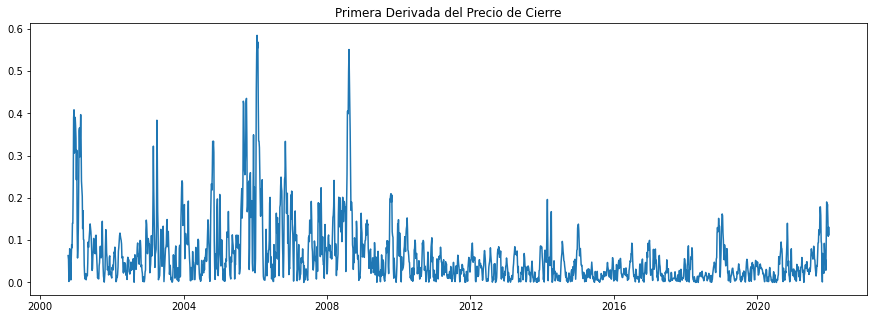

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(time_index_derivs, abs_derivada_de_promedios, color='#1f77b4')
plt.title('Primera Derivada del Precio de Cierre')
plt.show()

FileNotFoundError: ignored

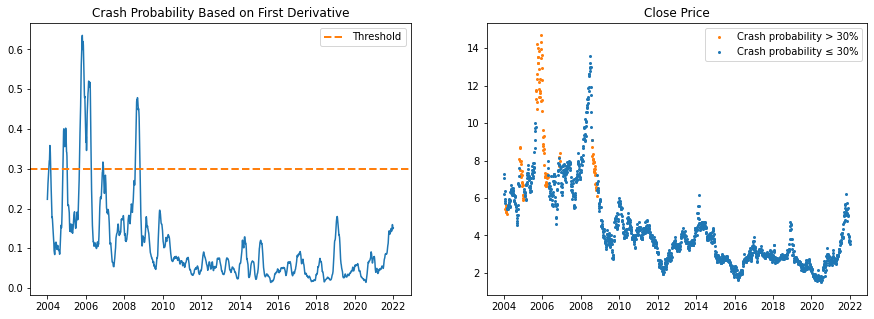

In [ ]:
plot_crash_detections(
    start_date="2004-01-01",
    end_date="2022-01-01",
    threshold=0.15,
    distances=abs_derivada_de_promedios,
    time_index_derivs=time_index_derivs,
    price_resampled_derivs=resampled_close_price_derivs,
    metric_name='First Derivative'
)

#### **Los diagramas de persistencia**
 Asociados a cada nube de puntos a partir de las ventanas deslizantes donde aparace información topológica sobre la dinámica en el espacio de incrustación

In [ ]:
# {VietorisRipsPersistence} Diagramas de persistencia resultantes de filtraciones por Vietoris-Rips. 
# {homology_dimensions} Dimensiones (enteros no negativos) de las características topológicas a detectar. 
# 0 - componentes conexas, 1 - bucles , 2 - vacios
# {n_jobs} El número de trabajos a utilizar para el cálculo.

homology_dimensions = [0, 1, 2]

persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs= None)
print("Diagrama de Persistencia para el valor de cierre del Gas")
DiagramPersistenciaGas=persistence.fit_transform(price_embedded_windows)

Diagrama de Persistencia para el valor de cierre del Gas


El eje horizontal corresponde al momento en que nace un generador homológico, mientras que el eje vertical corresponde a los momentos en que muere un generador homológico. 

Con esta herramienta y los pasos precedentes  se visuliza la poca precensia de ruido

In [ ]:
DiagramPersistencia=persistence.fit_transform_plot(price_embedded_windows)

###### **Derivadas homológicas**
Dado un diagrama de persistencia, es posible extraer algunas caracteristicas. Para está aplicación, es de interes calcular la distancia entre diagramas obtenidos a partir de dos ventanas sucesivas. Con un transformador personalizado. 

In [ ]:
from joblib import Parallel, delayed, effective_n_jobs

from sklearn.utils import gen_even_slices
from sklearn.utils.validation import check_is_fitted

from gtda.diagrams import PairwiseDistance
from gtda.diagrams._metrics import _parallel_pairwise, landscapes, betti_curves
from gtda.diagrams._utils import _subdiagrams
from gtda.utils.validation import check_diagrams


class HomologicalDerivative(PairwiseDistance):
    def __init__(self, **kw_args):
        super().__init__(**kw_args)

    def _derivatives_generic(self, X, s):

        return np.array(
            [
                _parallel_pairwise(
                    np.expand_dims(X[t + 1], axis=0),
                    np.expand_dims(X[t], axis=0),
                    self.metric,
                    self.effective_metric_params_,
                    self.homology_dimensions_,
                    self.n_jobs,
                )[0, 0]
                for t in range(s.start, s.stop, 1)
            ]
        )

    def _derivatives(self, subdiagrams, kind, dim, params):
        n_samples, n_points = subdiagrams.shape[:2]
        if kind == "landscape":
            n_layers = min(params["n_layers"], n_points)
            features = landscapes(subdiagrams, params["samplings"][dim], n_layers)
        elif kind == "betti":
            features = betti_curves(subdiagrams, params["samplings"][dim])
        features = (features[1:] - features[:-1]).reshape(n_samples - 1, -1)
        features = np.linalg.norm(features, axis=1, ord=params["p"])

        return (params["step_sizes"][dim] ** (1 / params["p"])) * features

    def fit(self, X, y=None):
        super().fit(X, y)

        return self

    def transform(self, X, y=None):
        check_is_fitted(self, ["effective_metric_params_", "homology_dimensions_"])
        X = check_diagrams(X)

        if self.metric in ["landscape", "betti"]:
            Xt = Parallel(n_jobs=self.n_jobs)(
                delayed(self._derivatives)(
                    _subdiagrams(X[s.start : s.stop + 1], [dim], remove_dim=True),
                    self.metric,
                    dim,
                    self.effective_metric_params_,
                )
                for dim in self.homology_dimensions_
                for s in gen_even_slices(len(X) - 1, effective_n_jobs(self.n_jobs))
            )
            Xt = np.concatenate(Xt)
            Xt = Xt.reshape(len(self.homology_dimensions_), len(X) - 1).T
        else:
            Xt = Parallel(n_jobs=self.n_jobs)(
                delayed(self._derivatives_generic)(X, s)
                for s in gen_even_slices(len(X) - 1, effective_n_jobs(self.n_jobs))
            )
            Xt = np.concatenate(Xt)

        if self.order is not None:
            Xt = np.linalg.norm(Xt, axis=1, ord=self.order)

        return Xt

- Distancia entre paisajes de persistencia a partir de el diagrama de persistencia del gas natural

In [ ]:
metric_params = {"p": 2, "n_layers": 10, "n_bins": 1000}

landscape_hom_der = HomologicalDerivative(
    metric="landscape", metric_params=metric_params, order=2, n_jobs=3
)
landscape_succ_dists = landscape_hom_der.fit_transform(DiagramPersistenciaGas)

In [ ]:
# Para poder operar
a = landscape_succ_dists 
b = np.zeros((1938, ))

def landscape_succ_dists(a,b):
    if len(a) < len(b):
        c = b.copy()
        c[:len(a)] += a
    else:
        c = a.copy()
        c[:len(b)] += b
    return(c)


print(landscape_succ_dists(a,b))

[0.0288589  0.05142548 0.04765902 ... 0.11222876 0.         0.        ]


- Gráficos comparando las Distancias de Paisaje (para los precios remuestreados de cierre del gas) con el gráfico de los precios remuetrados

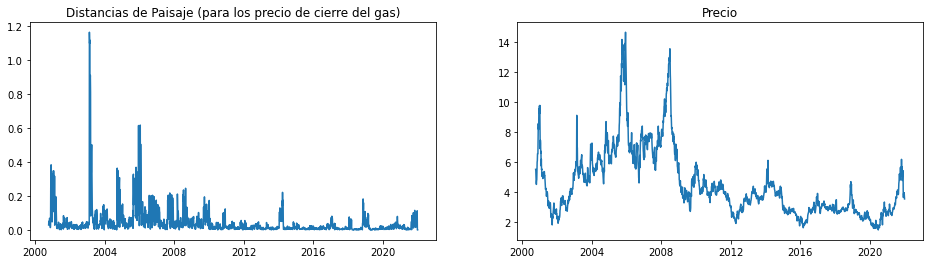

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(time_index_derivs, landscape_succ_dists(a,b), color="#1f77b4")
plt.title("Distancias de Paisaje (para los precio de cierre del gas)")

plt.subplot(1, 2, 2)
plt.plot(resampled_close_price_derivs, "#1f77b4")
plt.title("Precio")
plt.show()

- Distancias entre diagramas utilizando curvas de Betti 
con las norma $L^{p}$ para las curvas

In [ ]:
metric_params = {"p": 2, "n_bins": 1000}


bettiHomDer = HomologicalDerivative(
    metric='betti', metric_params=metric_params, order=2, n_jobs=-1
)
betti_succ_dists = bettiHomDer.fit_transform(DiagramPersistenciaGas)

In [ ]:
c = betti_succ_dists 
e = np.zeros((1938, ))

def betti_succ_dists(c,e):
    if len(c) < len(e):
        d = e.copy()
        d[:len(c)] += c
    else:
        d = c.copy()
        d[:len(e)] += e
    return(d)


print(betti_succ_dists(c,e))

[0.9902998  1.10750163 0.6858973  ... 1.7561229  0.         0.        ]


- Diferencia de la Norma de L^p comparada con el precio de cierre de los datos remuestreados

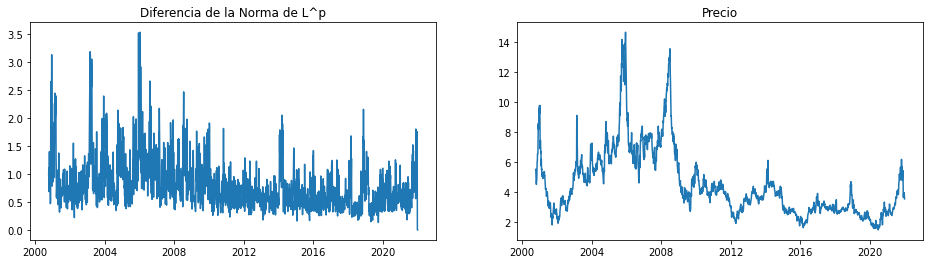

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(time_index_derivs, betti_succ_dists(c,e))
plt.title('Diferencia de la Norma de L^p')

plt.subplot(1, 2, 2)
plt.plot(resampled_close_price_derivs)
plt.title('Precio')
plt.show()

- 

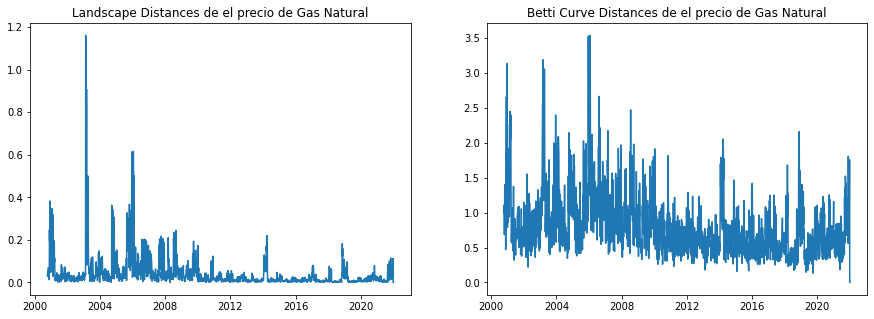

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(time_index_derivs, landscape_succ_dists(a,b), "#1f77b4")
plt.title("Distancias del paisaje de persistencia para el precio de Gas Natural")

plt.subplot(1, 2, 2)
plt.plot(time_index_derivs, betti_succ_dists(c,e), "#1f77b4")
plt.title('Distancias de las curvas de Betti para el precio de Gas Natural')
plt.show()

- Paisaje de persistencia para el **Gas Natural**

In [ ]:
# {n_layers} Cuántas capas se consideran en el paisaje de persistencia. 
# {n_bins } El número de valores de parámetros de filtración, por dimensión de la homología disponible, para muestrear durante {fit}

n_capas = 10
bins = 1000

GasLandscape = PersistenceLandscape(
    n_layers=n_capas, n_bins=bins, n_jobs=None
)

print("Paisaje de persistencia para los precios de cirre")
paisaje_persistencia=GasLandscape.fit_transform(DiagramPersistenciaGas)

Gas_paisaje_persistencia= GasLandscape.fit_transform_plot(DiagramPersistenciaGas)

Paisaje de persistencia para los precios de cirre


###**Algunos Resultados**

- Al comparar las diferentes formas de medir (paisajes de persistencia y curvas de Betti) el cambio de la firma topológica, se ha encontrado por algunos autores que el enfoque de paisaje contiene más información y es más resistente al ruido.

- Eligiendo algunos intervalos a partir de la primera derivada y de algunos sucesos se encuentra lo siguinete

FileNotFoundError: ignored

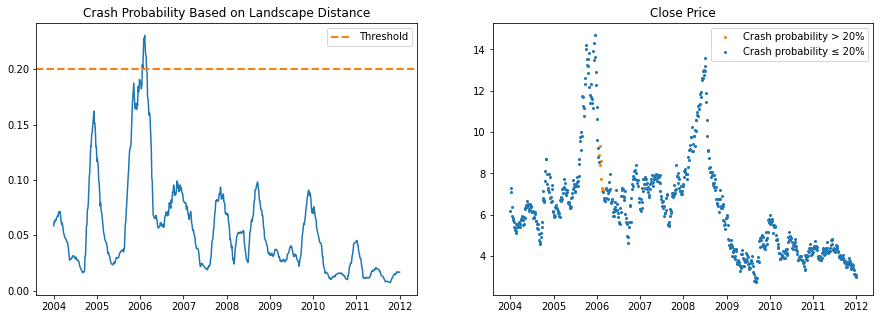

In [ ]:
plot_crash_detections(
    start_date="2004-01-01",
    end_date="2012-01-01",
    threshold=0.2,
    distances=landscape_succ_dists(a,b),
    time_index_derivs=time_index_derivs,
    price_resampled_derivs=resampled_close_price_derivs,
    metric_name='Landscape Distance'
)

FileNotFoundError: ignored

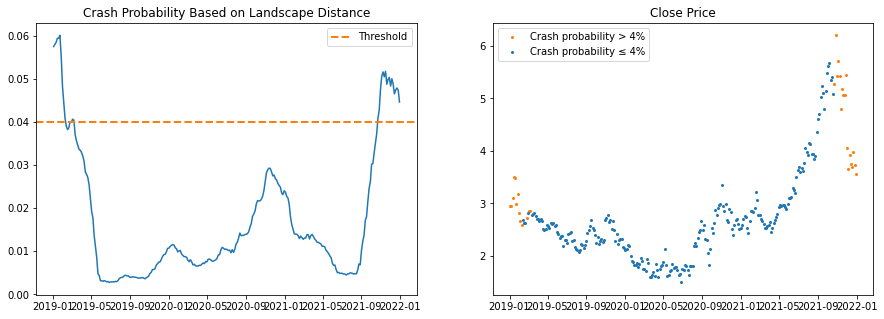

In [ ]:
plot_crash_detections(
    start_date="2019-01-01",
    end_date="2022-01-01",
    threshold=0.04,
    distances=landscape_succ_dists(a,b),
    time_index_derivs=time_index_derivs,
    price_resampled_derivs=resampled_close_price_derivs,
    metric_name='Landscape Distance'
)

FileNotFoundError: ignored

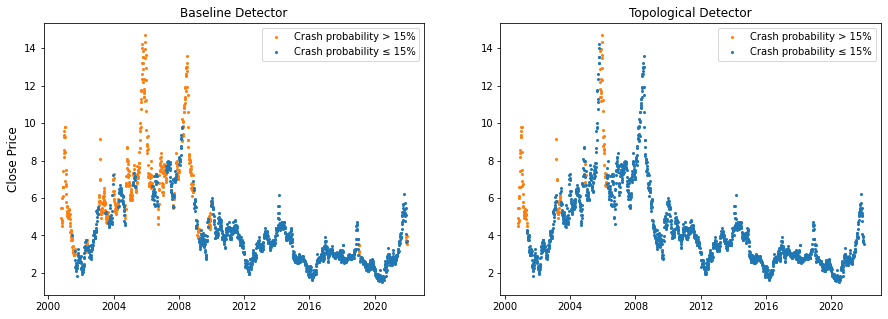

In [ ]:
plot_crash_comparisons(
    start_date="2000-01-01",
    end_date="2022-01-01",
    threshold=0.15,
    distances_1=abs_derivada_de_promedios,
    distances_2=landscape_succ_dists(a,b),
    time_index_derivs=time_index_derivs,
    price_resampled_derivs=resampled_close_price_derivs,
)

- Comparando el modelo de referencia con las características topológicas obtenidas

FileNotFoundError: ignored

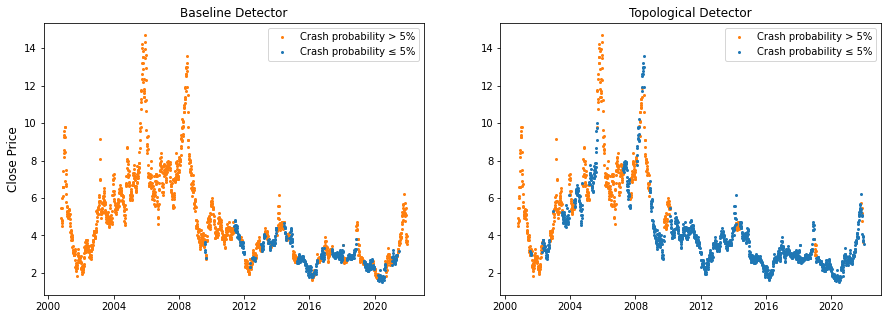

In [ ]:
plot_crash_comparisons(
    start_date="2000-01-01",
    end_date="2022-01-01",
    threshold=0.05,
    distances_1=abs_derivada_de_promedios,
    distances_2=landscape_succ_dists(a,b),
    time_index_derivs=time_index_derivs,
    price_resampled_derivs=resampled_close_price_derivs,
)